# Scenario design of experiments

*Open questions* / TO DOs

- ORGANIC in CLM inputdataset: for all LUTypes? Different simulations with different datasets if per dataset
- Grasslands? Low estimate of Sommer and Bosio? In what values does this result? 


## 0. Simulation set up: Open questions

- Separate PFT columns? 
- Irrigation? 
- I2000CLMSP? 
- Time period: 20 years? 
- input maps with increased SOM. 

## 1. soil organic carbon increase on CROPLANDS

Based on Zomer et al 2017 scenarios. 
(based on SOILGRIDS 250 m) 

Soil organic increase after **20 years** in **croplands**, first **30 cm**. 

! Assumption: *"An implicit basic assumption is that in general, 50 to 70% of soil carbon stocks have been lost in cultivated soils6,15,17, such that the SOC status of almost all cultivated soils can be increased. It is expected that these cropped soils will be able to sequester carbon for at least 20 years before reaching saturation points and new SOC equilibriums."*

### Three possibilities
#### 1. Relative increase in SOC using same method

Take scenarios from Sommer et Bosio, 2014: global increase in SOC (%). 

Apply same method of Zomer et al 2017 to WISE data on which CLM is based.

- convert CLM ORGANIC to soil organic carbon content or SOC% (ORG C); [g C/g soil]
- Apply percent increase after 20 years from Sommer and Bosio, 2014
   
    Two scenarios, increase after 20 years in first 30 centimenters
        - Medium %increase = 0.27 % 
        - High %increase = 0.55 %
        - Potentially also 4p1000 = 0.8 % (at which depth?)


```
ORGC_h_20 =  ORGC_h + %increase
```

    Integrate for different soil levels: CLM until 30 cm: First 5 soil levels!
    
```
ORGC_20 =  ORGC_h1_20 + ORGC_h2_20 + ORGC_h3_20
```
        
*Sanity check: compare amounts aggregated over countries/continents with Zomer et al 2017. (both increases as absolute amounts)*  

#### 2. (a) Absolute increase

- aggregate absolute SOC *increase* datasets for both scenarios (not potential) frm 250m to 0.5°
- Add absolute increase to CLM WISE data to obtain SOC in 20 years
- replace future CLM SOM inputdata in 20 years for croplands ONLY

Disadvantage: loss of consistency of SOM for different LUtypes (combination with grassland scenarios) Not important if analysed seperately in single grid cell columns, computationally expensive. 


#### 2. (b) Absolute amounts and increase
- aggregate both absolute SOC *today* and *potential in 20 years* datasets for both scenarios from 250m to 0.5°
- replace input data for CLM for croplands only. 


## unit conversion

WISE data integration in CLM

Copied from https://github.com/ESCOMP/CTSM/issues/1303#issuecomment-1103295279

ORGANIC using the same mapping unit information being used for texture.

I'm used to thinking about calculating organic matter stocks (kg C/m2), but the model only cares about organic matter density (kg OM/m3)
Technically, this should just be calculated on the fine earth fraction (1-coarse fragments).

the WISE lookup table has all of this information

| Property	| units	| long_name| 
|  -------  | ----- | -------- | 
| ORGC	| gC kg^-1 soil	| organic carbon content| 
| BULK	| g soil cm^-3	| bulk density| 
| CFRAG	| volumetric, %	| coarse fragment| 


Additionally we'll assume 1g OM = 0.58 gC. NOTE I have no idea where this conversion factor is from, but I'm assuming it was used for the old calculation of ORGANIC we've been using?

Thus:

```
ORGANIC = ORGC*BULK*(100-CFRAG)/100  *1/0.58 
```

**Convert CLM data to ORGC (organic carbon content)**

```
ORGC = 0.58 * ORGANIC*100 / (BULK*100-CFRAG)
```

combined with `ORGC_h_20 =  ORGC_h + ORGC_h * %increase`
```

```

## TEST possibility 1. 

## 2. Soil organic carbon increase on GRASSLANDS (grazing)

- until what depth? 

The low scenario in Sommer and Bossio (2014) was not used because it refers to sequestration rates estimated primarily for unimproved pasture land. (from Zomer et al., 2017)


What do other papers say in terms of potential? Look for more papers? 

##### From Bai et al. 2022: Science

"At the global scale, the mean theoretical, realistic, and achievable capacities of SOC sequestration with grassland restoration are estimated to be 10.2, 6.8, and 3.4 billion t CO2 equivalents per year (CO2e year−1)" See Fig. 4 A

##### Tessema et al. 2014 (Potential for soil organic carbon sequestration in grasslands in East African countries: A review)

*six East African countries (Burundi, Ethiopia, Kenya, Rwanda, Tanzania and Uganda) 
"In the studies reviewed, SOC stocks in grasslands range from 3 to 93 Mg C/ha in the upper 0.3 m of the soil profile, while SOC sequestration rate ranges from 0.1 to 3.1 Mg C ha -1 year-1 under different management strategies."*

Total carbon sequestration potential in grasslands per year
2.78 Pg/year for theoretical
1.85 Pg/year for realistic
0.93 Pg/year for achievable


Total carbon sequestration potential in grasslands after 20 years
55.599999999999994 Pg for theoretical
37.0 Pg for realistic
18.6 Pg for achievable


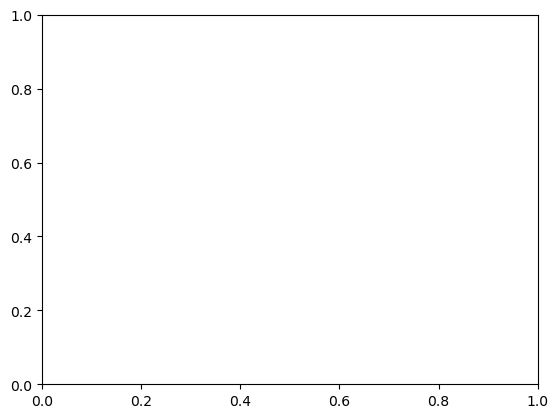

In [1]:
import numpy as np
import xarray as xr
from ctsm_py.utils import *

from iv_utils_daint import *

# convert values from Bai et al. 2022

grassland_co2eq = {}
grassland_co2eq['theoretical'] = 10.2e9 # ton CO2eq /year)
grassland_co2eq['realistic'] = 6.8e9 # ton CO2eq/year 
grassland_co2eq['achievable'] = 3.4e9 # ton CO2eq/year 


scenarios = list(grassland_co2eq.keys())
grassland_carbon = {}
# convert co2eq to gC: 1 ton of CO2 equivalent is equivalent to 12/44 tons of carbon (since the molecular weight of carbon is 12 and the molecular weight of CO2 is 44)
for scenario in scenarios: 
    grassland_carbon[scenario] = grassland_co2eq[scenario]  * 1000000 *  (12/44)# gC/year

print('Total carbon sequestration potential in grasslands per year')
for scenario in scenarios: 
    print(str(np.round(grassland_carbon[scenario]/1e15,2)) +' Pg/year for '+scenario)
print()
print()
print('Total carbon sequestration potential in grasslands after 20 years')
for scenario in scenarios: 
    print(str(np.round(grassland_carbon[scenario]/1e15,2)*20) +' Pg for '+scenario)


In [2]:
# directory settings
inputdir = '/scratch/snx3000/ivanderk/CCLM2_inputdata/cesm_inputdata/CTSM_hcru_inputdata/'

filename_ctsm52 = 'surfdata_360x720cru_hist_16pfts_CMIP6_2000_c230915.nc'
filename_clm5 = 'surfdata_360x720cru_16pfts_Irrig_CMIP6_simyr2000_c170824.nc'
ds_input_ctsm52 = xr.open_dataset(inputdir+filename_ctsm52)

da_grassland = ds_input_ctsm52['PCT_NAT_PFT'].sel(natpft=13) + ds_input_ctsm52['PCT_NAT_PFT'].sel(natpft=14)

gridarea = xr.open_dataset('/scratch/snx3000/ivanderk/processing_4p1000/gridarea_0.5x0.5.nc')['cell_area']

FileNotFoundError: [Errno 2] No such file or directory: b'/scratch/snx3000/ivanderk/CCLM2_inputdata/cesm_inputdata/CTSM_hcru_inputdata/surfdata_360x720cru_hist_16pfts_CMIP6_2000_c230915.nc'

In [ ]:
# for plotting purposes

# import case that has been run for longitude and latitude

# case settings
case_ctl = 'I2000Clm51Sp.hcru_hcru_mt13.4p1000_CTL.20230714-1828'
# I2000Clm51Sp.hcru_hcru_mt13.4p1000_CTL_pft.20230712-1723

case = case_ctl
block = "lnd"
stream = "h0"

variables = ["watsat", "H2OSOI" ]

start_year = 2004
end_year = 2004

time_slice = slice(str(start_year) + "-01-01", str(end_year) + "-12-01")

ds = import_case(case_ctl, myVars=variables, timeSlice=time_slice,  alter_lons=False)

# hydrologically active soil layers (constraint by varying bedrock depths) all in meters

# middle of soil layer: layer node depth (zi)
levsoi = ds['levsoi'].values

# tickness at soil layer - delta zi - from CLM user's guide Table 2.3 
levsoi_thickness = [0.02,0.04,0.6,0.8,0.12,0.16,0.2,0.24,0.28,0.32,0.36,0.4,0.44,0.54,0.64,0.74,0.84,0.94,1.04,1.14]

# depth at soil layer zh,i  - from CLM user's guide Table 2.3 
levsoi_depth     = [0.02,0.06,0.12,0.2,0.32,0.48,0.68,0.92,1.2,1.52,1.88,2.28,2.72,3.26,3.9,4.64,5.48,6.42,7.46,8.6]


# all soil layers (deepest 5 layers are for thermodynamical calculations)
levgrnd = ds['levgrnd'].values

# tickness at soil layer - delta zi - from CLM user's guide Table 2.3 
levgrnd_thickness = [0.02,0.04,0.6,0.8,0.12,0.16,0.2,0.24,0.28,0.32,0.36,0.4,0.44,0.54,0.64,0.74,0.84,0.94,1.04,1.14,2.39,4.676,7.635,11.14,15.115]

# depth at soil layer zh,i  - from CLM user's guide Table 2.3 
levgrnd_depth = [0.02,0.06,0.12,0.2,0.32,0.48,0.68,0.92,1.2,1.52,1.88,2.28,2.72,3.26,3.9,4.64,5.48,6.42,7.46,8.6,10.99,15.666,23.301,34.441,49.556]



In [ ]:
landmask = (ds['watsat']>=0)[0,0,:,:].squeeze()

da_grassland_toplot =  da_grassland.assign_coords(lsmlat= (ds['watsat'].lat.values)).assign_coords(lsmlon= (ds['watsat'].lon.values)).rename({'lsmlon':'lon', 'lsmlat':'lat'})
gridarea_toplot = gridarea.assign_coords(lat= (ds['watsat'].lat.values)).assign_coords(lon= (ds['watsat'].lon.values))
plt.figure(figsize=(12,5))
proj=ccrs.PlateCarree()
ax = plt.subplot(111, projection=proj)
# limiting values for plotting are given    
levels = np.concatenate([np.array([0,1]),(np.arange(10,110,10))])
da_grassland_toplot.where(landmask).plot(ax=ax, cmap='gist_earth_r', cbar_kwargs={'label': ' %', 'fraction': 0.02, 'pad': 0.04, 'ticks':levels}, levels=levels)
ax.set_title(' ', loc='center')
ax.set_title('Percent grassland of gridcell', loc='right')
ax.coastlines(color='dimgray', linewidth=0.5)

# exclude Antactica from plot
ax.set_extent((-180,180,-63,90), crs=proj);
ax.axis('off')

In [ ]:
((da_grassland_toplot * gridarea_toplot)/1e4).plot() #ha

## EXTRA: model global carbon sequestration scenarios of Sommer and Bosio, 2014

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
## INITIALISATION

# initial soil organic carbon content (%)
SOC_0 = {}

# empirical constants
a = {}
b = {}

# year with highest annual sequestration rate
t0 = {} 

# soil organic carbon sequestration per year
# THIS DOES NOT INFLUENCE RATES !!!
SOC = {}


# assumed soil bulk density: 1.3 g/cm3

In [ ]:
## ADDING CONSTANTS
# based on Table 1

scenarios = ['low','medium','high']

a['low'] = 0.350 
b['low'] = 11.5
t0['low'] = 3
SOC_0['low'] = 0.85

a['medium'] = 0.697
b['medium'] = 11.5
t0['medium'] = 4
SOC_0['medium'] = 0.71

a['high'] = 1.202
b['high'] = 9.8
t0['high'] = 7
SOC_0['high'] = 0.6

In [ ]:
t = np.arange(0,51,1)

In [ ]:
scenario = 'high'

In [ ]:
for scenario in scenarios: 

    SOC[scenario] = SOC_0[scenario]  + a[scenario] / (1+np.exp(- (t-t0[scenario])/b[scenario]))

In [ ]:
fig,ax= plt.subplots()

for scenario in scenarios: 
    ax.plot(t,SOC[scenario], label=scenario)
ax.legend()
ax.set_ylabel('Soil Organic carbon (%)')
ax.set_title('Increase in SOC', loc='right')
ax.set_xlabel('year')
ax.axvline(x=20, ymin=0, ymax=1, color='gray')
ax.set_xlim([0,np.max(t)])